In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [3]:
df_ml = pd.read_csv('../artifacts/results_ml_models.csv')
df_cnn = pd.read_csv('../artifacts/results_cnn_models.csv')
df_trans = pd.read_csv('../artifacts/results_Transformer_models.csv')

# CNN Models

In [6]:
df_cnn

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val
0,0.491361,0.433737,0.491361,0.435020,0.625915,0.185693,0.195979,HopefullNet,HopefullNet,Motor Imaginary,All,0.454935,0.453268
1,0.429266,0.429659,0.429266,0.428714,0.544203,0.170032,0.170197,ShallowConvNet,ShallowConvNet,Motor Imaginary,All,0.406580,0.421394
2,0.390389,0.446077,0.390389,0.406031,0.551342,0.177716,0.181829,EEGNet,EEGNet,Motor Imaginary,All,0.404585,0.366829
3,0.317495,0.474600,0.317495,0.338650,0.523821,0.149367,0.161726,DeepConvNet,DeepConvNet,Motor Imaginary,All,0.417395,0.312264


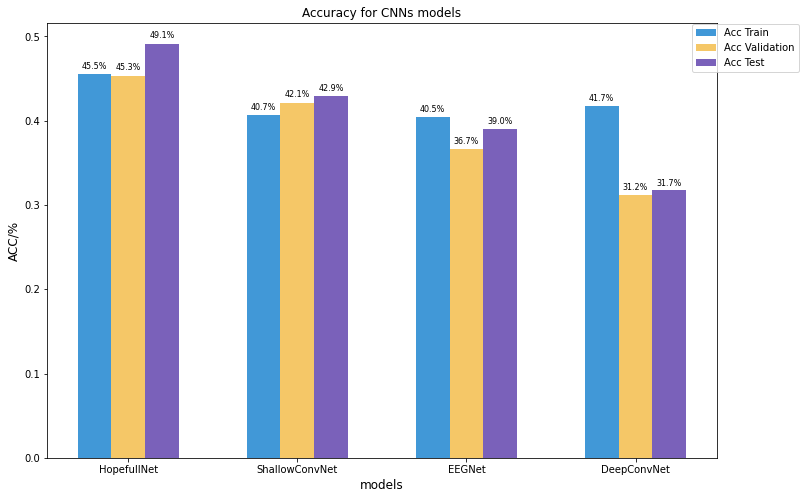

In [8]:
top_1 = df_cnn.iloc[:,-2]
top_3 = df_cnn.iloc[:,-1]
top_5 = df_cnn.iloc[:,0]
xlabels = df_cnn.iloc[:,8]
N = len(df_cnn.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Accuracy for CNNs models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=8)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_cnn.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Machine Learning Models

In [9]:

df_ml['label'] = df_ml.pipeline.replace("time domain features -> wavelet", "TmFq + Wvl") +' + '+ df_ml.model_name
df_ml


,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name,label
0,0.712,0.206049,0.454224,0.206049,0.216884,0.518495,0.054072,0.061776,Motor Imaginary,All subjects,PCA,KNN,PCA + KNN
1,0.665,0.407237,0.408934,0.407237,0.407789,0.591698,0.141235,0.141313,Motor Imaginary,All subjects,PCA,XGB,PCA + XGB
2,0.402,0.458007,0.335580,0.458007,0.358472,0.509427,0.025115,0.032261,Motor Imaginary,All subjects,time domain features -> wavelet,XGB,TmFq + Wvl + XGB
3,0.363,0.367000,0.444837,0.367000,0.392866,0.574071,0.152563,0.156270,Motor Imaginary,All subjects,PCA,SVM,PCA + SVM
4,0.345,0.326762,0.318082,0.326762,0.321282,0.483109,0.010321,0.010359,Motor Imaginary,All subjects,time domain features -> wavelet,SVM,TmFq + Wvl + SVM
5,0.284,0.328922,0.320010,0.328922,0.323754,0.509196,0.008913,0.008930,Motor Imaginary,All subjects,time domain features -> wavelet,KNN,TmFq + Wvl + KNN


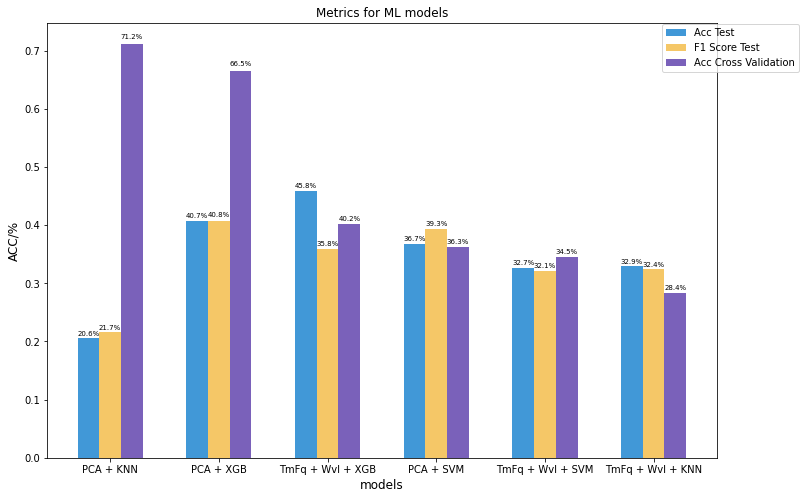

In [12]:
top_1 = df_ml.iloc[:,1]
top_3 = df_ml.iloc[:,4]
top_5 = df_ml.iloc[:,0]
xlabels = df_ml.iloc[:,-1]
N = len(df_ml.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Test', 'F1 Score Test','Acc Cross Validation'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_ml.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Transformers Models

In [11]:
df_trans

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val
0,0.418467,0.437529,0.418467,0.422776,0.585048,0.178598,0.180314,Transformer,Transformer,Motor Imaginary,All,0.309035,0.361966
1,0.389309,0.435101,0.389309,0.405994,0.544443,0.160561,0.162635,Transformer Pos Enc,Transformer Pos Enc,Motor Imaginary,All,0.497654,0.366288


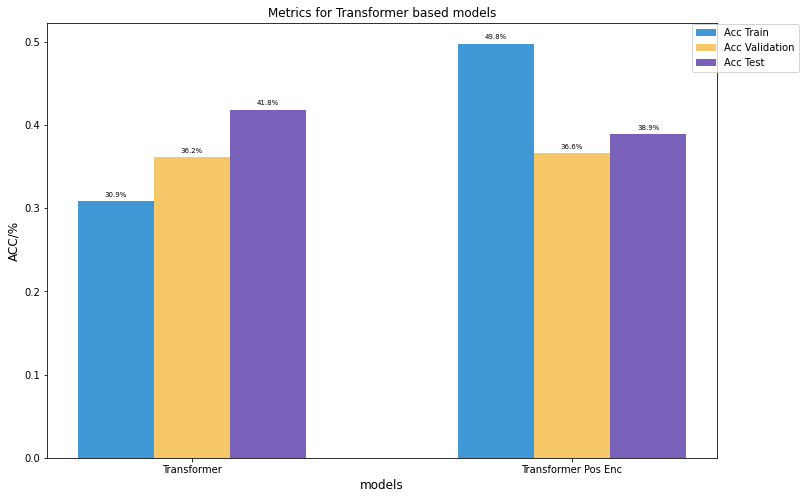

In [14]:
top_1 = df_trans.iloc[:,-2]
top_3 = df_trans.iloc[:,-1]
top_5 = df_trans.iloc[:,0]
xlabels = df_trans.iloc[:,8]
N = len(df_trans.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)

ax.set_title('Metrics for Transformer based models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_trans.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Comparing Models

In [15]:
all_models = pd.concat([
                    df_trans[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_cnn[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_ml[['label','Accuracy']].rename(columns = {'label':'Model'})], axis=0, ignore_index=True)
all_models = all_models.sort_values(['Accuracy'], ascending=False)
all_models.to_csv('../artifacts/results_all_models.csv', index=False, header=True)                    
all_models                    

,Model,Accuracy
2,HopefullNet,0.491361
8,TmFq + Wvl + XGB,0.458007
3,ShallowConvNet,0.429266
0,Transformer,0.418467
7,PCA + XGB,0.407237
4,EEGNet,0.390389
1,Transformer Pos Enc,0.389309
9,PCA + SVM,0.367000
11,TmFq + Wvl + KNN,0.328922
10,TmFq + Wvl + SVM,0.326762


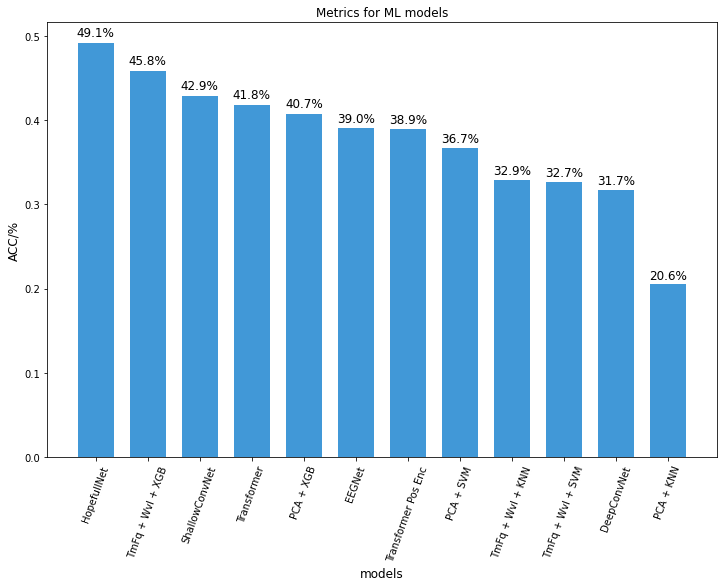

In [16]:
top_1 = all_models.iloc[:,1]
xlabels = all_models.iloc[:,0]
N = len(all_models.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.7      # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models')
# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.savefig('../artifacts/barplot_all.png',dpi=200, format='png', bbox_inches='tight')
plt.show()